In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import pandas as pd

In [2]:
emotion_classes = [0,1,2,3,4,5,6]

In [6]:
label_path = '../../data/ck/Emotion/'
image_path = '../../data/ck/cohn-kanade-images/'

In [7]:
faces=[]
labels=[]

In [8]:
temp_class = np.loadtxt(label_path+'S032/003/S032_003_00000017_emotion.txt')

In [9]:
temp_class.astype('int').tolist()

1

In [10]:
temp_img = cv2.imread('../../data/ck/cohn-kanade-images/S032/001/S032_001_00000001.png',0)

In [11]:
temp_img.shape

(490, 640)

In [12]:
os.listdir(image_path) == os.listdir(label_path)

False

In [15]:
#os.listdir(image_path)

In [16]:
for subject in os.listdir(image_path):
    #check if subject num corresponds to each other
    if os.listdir(image_path+subject) != os.listdir(label_path+subject):
        continue
    else:
        #go to folder under each subject
        for each_emotion in os.listdir(image_path+subject):
            #check if emotion folder in subject is empty
            each_emotion_path = label_path+subject+'/'+each_emotion+'/'
            each_image_path = image_path+subject+'/'+each_emotion+'/'
            if os.listdir(each_emotion_path) == []:
                continue
            else:
                last_one = os.listdir(each_image_path)[-1]
                face = cv2.imread(each_image_path+last_one, 0)
                labels.append(np.loadtxt(each_emotion_path+os.listdir(each_emotion_path)[0]).astype('int').tolist())
                faces.append(np.asarray(face))
labels, faces=np.asarray(labels), np.asarray(faces)

In [12]:
updated_faces, updated_labels = [],[]

In [13]:
for face, emotion_tag in zip(faces,labels):
    if emotion_tag == 2:
        continue
    else:
        updated_faces.append(face)
        updated_labels.append(emotion_tag)

In [14]:
updated_faces, updated_labels = np.asarray(updated_faces), np.asarray(updated_labels)

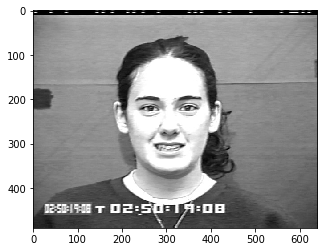

In [105]:
plt.imshow(updated_faces[0], cmap='gray')

In [106]:
len(updated_faces)

284

In [107]:
len(faces)

301

In [87]:
np.savetxt('labels_temp.csv', labels,delimiter=',')

In [88]:
temp_label = pd.read_csv('labels_temp.csv',sep=',',header=None)

In [90]:
#temp_label

In [91]:
pd.DataFrame(faces).to_csv('images.csv')

In [92]:
temp_images = pd.read_csv('images.csv',sep=',',header=None)

In [95]:
#temp_images

In [96]:
#get the test accuracy based on our parameters

In [15]:
import sys
import cv2
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input
import os

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
# parameters for loading data and images
emotion_model_path = 'fer2013_mini_XCEPTION.56-0.65.hdf5'
font = cv2.FONT_HERSHEY_SIMPLEX
detection_model_path = 'haarcascade_frontalface_default.xml'
# hyper-parameters for bounding boxes shape
emotion_offsets = (20, 40)
#emotion_offsets = (0, 0)

In [28]:
# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]

In [29]:
emotion_classifier.input_shape
emotion_target_size

(64, 64)

In [30]:
test_faces = []

In [31]:
for face in updated_faces:
    test_faces.append(cv2.resize(face.astype('uint8'), emotion_target_size))
test_faces = np.asarray(test_faces)

In [32]:
test_faces.shape

(284, 64, 64)

In [33]:
test_labels=[]

In [34]:
'''
ck_labels ={0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise}
fer_labels = {0:'angry',1:'disgust',2:'fear',3:'happy',
                4:'sad',5:'surprise',6:'neutral'}
'''

"\nck_labels ={0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise}\nfer_labels = {0:'angry',1:'disgust',2:'fear',3:'happy',\n                4:'sad',5:'surprise',6:'neutral'}\n"

In [35]:
for l in updated_labels:
    if l == 0:
        test_labels.append(6)
    elif l == 1:
        test_labels.append(0)
    elif l == 3:
        test_labels.append(1)
    elif l == 4:
        test_labels.append(2)
    elif l == 5:
        test_labels.append(3)
    elif l == 6:
        test_labels.append(4)
    else:
        test_labels.append(5)

In [36]:
test_labels = np.asarray(test_labels)

In [60]:
detect_faces(face_detection, updated_faces[3])

array([[173, 138, 251, 251]], dtype=int32)

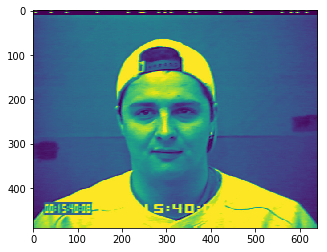

In [61]:
plt.imshow(updated_faces[3])

In [75]:
pred_emotions =[]
for gray_image in updated_faces:
    #coordinate = detect_faces(face_detection, gray_image)[0]
    #print(coordinate)
    #x1,x2,y1,y2 = apply_offsets(coordinate, emotion_offsets)
    x1,x2,y1,y2 = 200, 450, 100, 380
    gray_image = gray_image[y1:y2, x1:x2]
    try:
        gray_image = cv2.resize(gray_image, (emotion_target_size))
    except:
        continue
    gray_image = np.squeeze(gray_image)
    gray_image = preprocess_input(gray_image, True)
    gray_image = np.expand_dims(gray_image, 0)
    gray_image = np.expand_dims(gray_image, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_image))
    pred_emotions.append(emotion_label_arg)

In [76]:
acc = 0
for truth, pred in zip(test_labels,pred_emotions):
    if truth == pred:
        acc  += 1
    else:
        continue
acc = acc/len(test_labels)

In [77]:
print(acc)

0.4119718309859155


In [78]:
pred_emotions[:10]

[3, 3, 6, 3, 0, 3, 6, 6, 0, 5]

In [79]:
test_labels[:10]

array([3, 1, 5, 1, 0, 3, 5, 3, 1, 5])

In [80]:
#confusion matrix 
# x coordinate are predition emotion)
# y coordiante is truth emotions
confusion_matrix = np.zeros((7,7))

In [82]:
for pred, truth in zip(pred_emotions, test_labels):
    confusion_matrix[truth, pred] += 1

In [85]:
confusion_matrix

array([[13.,  0.,  2.,  1.,  7.,  1., 17.],
       [18.,  4.,  0.,  5.,  4.,  0., 24.],
       [ 4.,  0.,  1.,  3.,  4.,  2.,  9.],
       [ 0.,  0.,  1., 47.,  2.,  0., 13.],
       [ 0.,  0.,  1.,  0., 16.,  0.,  9.],
       [ 6.,  0.,  1.,  2.,  2., 36., 29.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [89]:
matrix = np.zeros_like(confusion_matrix)
for index, i in enumerate(np.sum(confusion_matrix,axis=1)):
    if index == 6:
        break
    matrix[index,:] = confusion_matrix[index,:]/i
    

In [90]:
matrix

array([[0.31707317, 0.        , 0.04878049, 0.02439024, 0.17073171,
        0.02439024, 0.41463415],
       [0.32727273, 0.07272727, 0.        , 0.09090909, 0.07272727,
        0.        , 0.43636364],
       [0.17391304, 0.        , 0.04347826, 0.13043478, 0.17391304,
        0.08695652, 0.39130435],
       [0.        , 0.        , 0.01587302, 0.74603175, 0.03174603,
        0.        , 0.20634921],
       [0.        , 0.        , 0.03846154, 0.        , 0.61538462,
        0.        , 0.34615385],
       [0.07894737, 0.        , 0.01315789, 0.02631579, 0.02631579,
        0.47368421, 0.38157895],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])